In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing and reading file

data = pd.read_csv(r"Output.csv")
df = pd.DataFrame(data)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 🎯 Video Game Sales Dataset – Insight Questions
----
## 🧠 General Insights

### 1. Which are the top 10 best-selling games based on `Global_Sales`?

In [3]:
top10 = df[['Name','Global_Sales']].sort_values(ascending=False, by='Global_Sales').head(10)

fig = px.area(top10, x='Name', y='Global_Sales', markers=True)
fig.update_traces(marker=dict(line=dict(color='white', width=3)))
fig.show()

### 2. What is the total count of unique `Games`, `Platforms`, `Genres`, and `Publishers`?

In [4]:
total_count = {
    "Total Games": df['Name'].nunique(),
    "Total Platforms" : df['Platform'].nunique(),
    "Total Genres" : df['Genre'].nunique(),
    "Total Publishers" : df['Publisher'].nunique()
}

total_count

{'Total Games': 11325,
 'Total Platforms': 31,
 'Total Genres': 12,
 'Total Publishers': 576}

### 3. Which `Year` had the highest total number of game releases?

In [5]:
df['Year'].value_counts().head(1)

Year
2009    1431
Name: count, dtype: int64

### 4. Which `Year` recorded the maximum `Global_Sales` overall?

In [6]:
max_global_sales = df[['Year', 'Global_Sales']].sort_values(ascending=False, by='Global_Sales').head(1)
max_global_sales

,Year,Global_Sales
0,2006,82.74


### 5. What is the average `Global_Sales` per game across all platforms?

In [7]:
avg_sale_per_game = df['Global_Sales'].mean().round(2)
print(f"The average Global_Sales per game across all platforms is : {avg_sale_per_game}")

The average Global_Sales per game across all platforms is : 0.54


## 🎮 Platform-Based Insights

### 6. Which `Platform` has the highest total `Global_Sales`?

In [8]:
highest_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(3)

fig = px.pie(highest_sales, values=highest_sales.values, names=highest_sales.index, width=500, hole=0.33)
fig.update_traces(marker=dict(line=dict(color='white', width=10)))
fig.show()

### 7. What are the top 5 `Platforms` by number of games released?

In [9]:
top_platforms = df.groupby('Platform')['Name'].count().sort_values(ascending=False).head(5)

fig = px.pie(top_platforms, values=top_platforms.values, names=top_platforms.index, width=500, hole=0.1, color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(marker=dict(line=dict(color='white', width=5)))
fig.show()

### 8. Which `Platform` dominates in regional sales like `NA_Sales` or `EU_Sales`?

In [10]:
regional_sales = df.groupby('Platform')[['NA_Sales','EU_Sales']].sum().sort_values(ascending=False, by='NA_Sales').head(15)

fig = px.funnel(regional_sales, x=regional_sales.index, y=['NA_Sales', 'EU_Sales'], title="Regional Sales of NA_Sales & EU_Sales")
fig.show()

### 9. How has the popularity of each `Platform` changed over the years?

In [11]:
df.groupby(['Year','Platform'])['Global_Sales'].mean().reset_index().tail()

,Year,Platform,Global_Sales
236,2016,X360,0.103750
237,2016,XOne,0.229074
238,2017,PS4,0.030000
239,2017,PSV,0.010000
240,2020,DS,0.290000


### 10. Is there any correlation between `Platform` and `Genre` in terms of total `Sales`?

In [12]:
df.groupby(['Platform','Genre'])['Global_Sales'].sum().reset_index().sort_values(ascending=False, by="Global_Sales").head()

,Platform,Genre,Global_Sales
153,PS3,Action,304.02
244,Wii,Sports,289.95
266,X360,Shooter,277.23
141,PS2,Action,272.43
151,PS2,Sports,262.64


## 📈 Genre Insights
### 11. Which `Genre` has the highest total `Global_Sales`?

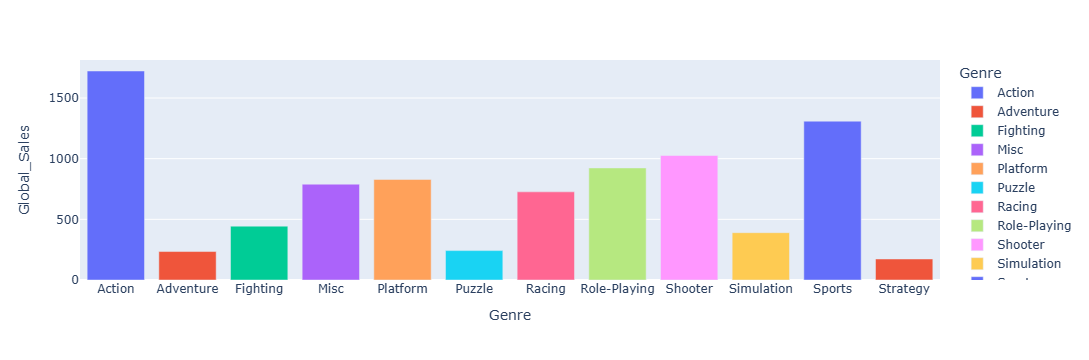

In [13]:
highest_genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

fig = px.bar(highest_genre_sales, y='Global_Sales', x='Genre', color='Genre')
fig.show()

### 12. What is the average `Sales` per game for each `Genre`?

In [14]:
df.groupby('Genre')['Global_Sales'].mean().round(2).reset_index()

,Genre,Global_Sales
0,Action,0.53
1,Adventure,0.18
2,Fighting,0.53
3,Misc,0.47
4,Platform,0.95
5,Puzzle,0.42
6,Racing,0.59
7,Role-Playing,0.63
8,Shooter,0.80
9,Simulation,0.46


### 13. Which `Genre` is most popular in `NA_Sales`, `EU_Sales`, and `JP_Sales` regions?

In [15]:
pop_genre = {
    "NA_Sales" : df.groupby('Genre')['NA_Sales'].sum().idxmax(),
    "EU_Sales" : df.groupby('Genre')['EU_Sales'].sum().idxmax(),
    "JP_Sales" : df.groupby('Genre')['JP_Sales'].sum().idxmax()
}

pop_genre

{'NA_Sales': 'Action', 'EU_Sales': 'Action', 'JP_Sales': 'Role-Playing'}

### 14. Are there specific `Genres` that perform better in certain regions?

In [16]:
top_genres = {
    "NA": df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(3),
    "EU": df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).head(3),
    "JP": df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(3)
}

print(f"{top_genres['NA']}\n")
print(f"{top_genres['EU']}\n")
print(f"{top_genres['JP']}")

Genre
Action     861.77
Sports     670.09
Shooter    575.16
Name: NA_Sales, dtype: float64

Genre
Action     516.48
Sports     371.34
Shooter    310.45
Name: EU_Sales, dtype: float64

Genre
Role-Playing    350.29
Action          158.65
Sports          134.76
Name: JP_Sales, dtype: float64


### 15. Which `Genre` has shown consistent success across all `Platforms`?

In [17]:
df.groupby('Genre')['Global_Sales'].std().round(3).sort_values(ascending=False).reset_index().head()

,Genre,Global_Sales
0,Platform,2.600
1,Sports,2.105
2,Shooter,1.834
3,Role-Playing,1.717
4,Racing,1.677


## 🏢 Publisher Insights
### 16. Which `Publisher` has released the most games?

In [18]:
df['Publisher'].value_counts().reset_index().head(3)

,Publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928


### 17. Which `Publisher` has the highest average `Global_Sales` per game?

In [19]:
df.groupby('Publisher')['Global_Sales'].mean().round(2).sort_values(ascending=False).reset_index().head()

,Publisher,Global_Sales
0,Palcom,4.17
1,Red Orb,2.62
2,Nintendo,2.56
3,Arena Entertainment,2.36
4,UEP Systems,2.25


### 18. What are the top 5 `Publishers` by total `Global_Sales`?

In [20]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head()
fig = px.pie(top_publishers, names='Publisher', values='Global_Sales', color='Publisher', hole=0.25, width=600, title="Top Publishers by total Sales")
fig.update_traces(marker=dict(line=dict(color='White', width=3)))
fig.show()

### 19. Does a specific `Publisher` dominate particular `Genres`?

In [21]:
df.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head()

,Publisher,Genre,Global_Sales
0,Electronic Arts,Sports,468.69
1,Nintendo,Platform,426.18
2,Activision,Shooter,295.40
3,Nintendo,Role-Playing,284.57
4,Nintendo,Sports,218.01


### 20. Which `Publisher` has the largest market share by region?

In [22]:
largest_share = {
    "NA": df.groupby('Publisher')['NA_Sales'].sum().idxmax(),
    "EU": df.groupby('Publisher')['EU_Sales'].sum().idxmax(),
    "JP": df.groupby('Publisher')['JP_Sales'].sum().idxmax()
}

print(f"'{largest_share['NA']}' has the largest market share by region")

'Nintendo' has the largest market share by region


## 🌍 Regional & Trend Insights
### 21. Which `Region` (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) contributes most to total `Global_Sales`?

In [23]:
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in region:
    total = {f"Total Global Sales by {i}" : f"{df[i].sum().round(2)}"}
    print(total)
print(f"\nHence, Region 'NA_Sales' contributes most to the total Global Sales")

{'Total Global Sales by NA_Sales': '4327.65'}
{'Total Global Sales by EU_Sales': '2406.69'}
{'Total Global Sales by JP_Sales': '1284.27'}
{'Total Global Sales by Other_Sales': '788.91'}

Hence, Region 'NA_Sales' contributes most to the total Global Sales


### 22. Are there major differences in `Genre` preferences across regions?

In [24]:
top_genre_by_region = {
    "NA": df.groupby('Genre')['NA_Sales'].sum().idxmax(),
    "EU": df.groupby('Genre')['EU_Sales'].sum().idxmax(),
    "JP": df.groupby('Genre')['JP_Sales'].sum().idxmax()
}
top_genre_by_region

{'NA': 'Action', 'EU': 'Action', 'JP': 'Role-Playing'}

### 23. Which games are top sellers in `Japan` versus `North America`?

In [25]:
versus = {
    "Japan": df.sort_values('JP_Sales', ascending=False).head()[['Name', 'JP_Sales']],
    "North America": df.sort_values('NA_Sales', ascending=False).head()[['Name', 'NA_Sales']]
}

print(f"Top sellers games in Japan : \n{versus['Japan']}\n")
print(f"\nTop sellers games in North America : \n{versus['North America']}")

Top sellers games in Japan : 
                             Name  JP_Sales
4        Pokemon Red/Pokemon Blue     10.22
12    Pokemon Gold/Pokemon Silver      7.20
1               Super Mario Bros.      6.81
6           New Super Mario Bros.      6.50
20  Pokemon Diamond/Pokemon Pearl      6.04


Top sellers games in North America : 
                Name  NA_Sales
0         Wii Sports     41.49
1  Super Mario Bros.     29.08
9          Duck Hunt     26.93
5             Tetris     23.20
2     Mario Kart Wii     15.85


### 24. How have total `Global_Sales` and `Genre` popularity changed over the `Years`?

In [26]:
changes = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(100)

fig = px.bar(changes, x='Genre', y='Global_Sales', color='Genre', hover_data='Year', hover_name='Genre')
fig.show()

### 25. Is there a strong correlation between regional sales (`NA_Sales`, `EU_Sales`, `JP_Sales`) and overall `Global_Sales`?

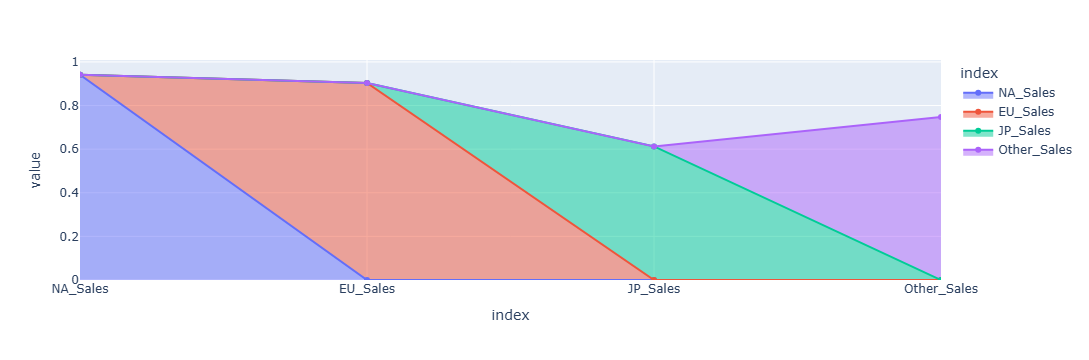

In [27]:
sales_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()['Global_Sales'].drop('Global_Sales')

fig = px.area(sales_region, markers=True, color=sales_region.index)
fig.show()